# Linear models

### Linear regression

Simplifying complex patterns into a straight “line of best fit”.

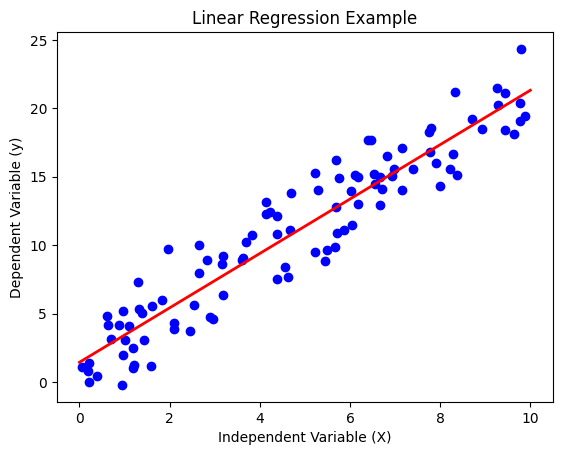

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Create some data
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Independent variable (hours studied)
y = 2 * X + 1 + np.random.randn(100, 1) * 2  # Dependent variable (test scores)

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Make predictions
X_new = np.array([[0], [10]])
y_predict = model.predict(X_new)

# Plotting the results
plt.scatter(X, y, color='blue')  # plot the data points
plt.plot(X_new, y_predict, color='red', linewidth=2)  # plot the regression line
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (y)')
plt.title('Linear Regression Example')
plt.show()


### Logistic regression


It predicts the probability of occurrence of an event by fitting data to a logistic curve. It is widely used for classification problems where the outcomes are discrete (e.g., yes/no, 0/1).

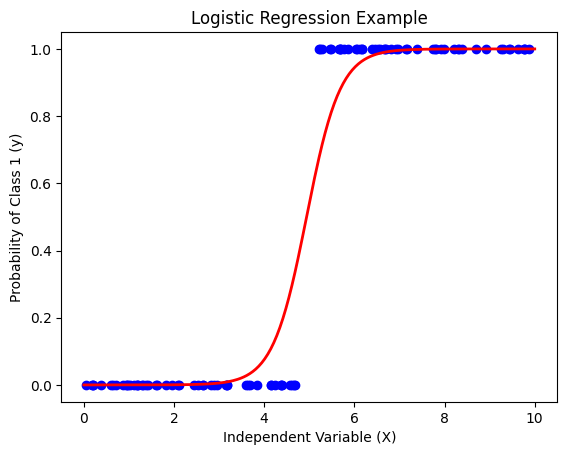

In [2]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Create some data
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Independent variable (e.g., hours studied)
y = (X > 5).astype(np.float64).ravel()  # Dependent variable (e.g., pass/fail)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model
model.fit(X, y)

# Make predictions
X_test = np.linspace(0, 10, 300)
y_prob = model.predict_proba(X_test.reshape(-1, 1))[:, 1]

# Plotting the results
plt.scatter(X, y, color='blue')  # plot the data points
plt.plot(X_test, y_prob, color='red', linewidth=2)  # plot the logistic regression curve
plt.xlabel('Independent Variable (X)')
plt.ylabel('Probability of Class 1 (y)')
plt.title('Logistic Regression Example')
plt.show()

### Support vector machine



What’s an hyperplane ? In the context of SVMs, a hyperplane is a decision boundary that separates different classes in the feature space.
Separating different types of fruits using the best hyperplane.

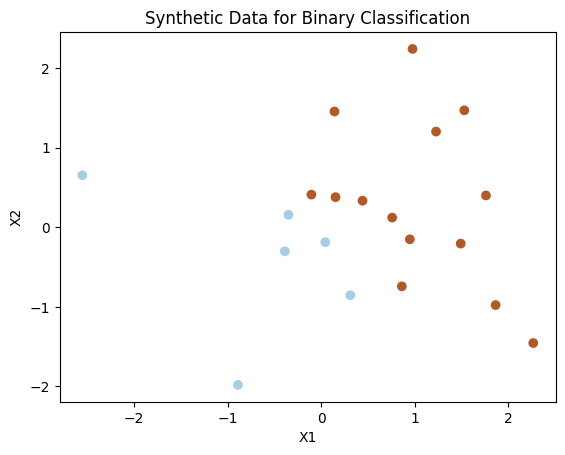

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create random data
np.random.seed(0)
X = np.random.randn(20, 2)
Y = np.where(X[:, 0] + X[:, 1] > 0, 1, -1)

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Synthetic Data for Binary Classification')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [5]:
# Create an SVM classifier with a linear kernel
from sklearn import svm
clf = svm.SVC(kernel='linear')

# Train the classifier on the training data
clf.fit(X_train, Y_train)

# Make predictions
Y_pred = clf.predict(X_test)

# Non-linear Models

### K-Nearest Neighbours

 Identifying a fruit type based on its similarity to known fruits.

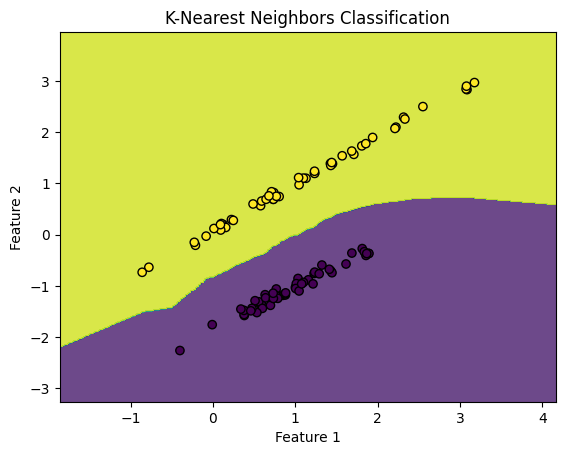

In [6]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate a random binary classification problem.
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Create a KNN classifier model
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model
knn.fit(X, y)

# We create a mesh of points to visualize the decision boundaries of the KNN classifier
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                 np.arange(y_min, y_max, 0.02))

# Predict class for each point in the mesh
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the results
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Nearest Neighbors Classification')
plt.show()

### Naïve Bayes

In the context of fruit classification, Naive Bayes would calculate the probability of a fruit being, say, an apple or an orange based on features like color, size, and texture, and then classify it as the type of fruit with the highest calculated probability.

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Sample data
# Features: weight (grams), color (0 = Green, 1 = Yellow, 2 = Red)
# Target: types of fruits
features = np.array([[150, 0], [170, 0], [140, 2], [130, 2], [200, 1], [180, 1]])
labels = np.array(["Apple", "Apple", "Cherry", "Cherry", "Banana", "Banana"])

# don't bother for this step, it is just used to encode string labels to integers
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Creating and training the Naive Bayes model
model = GaussianNB()
model.fit(features, labels_encoded)

# Making predictions
# Let's predict the fruit type for a 160g green fruit and a 190g yellow fruit
predicted = model.predict([[160, 0], [190, 1]])
predicted_labels = label_encoder.inverse_transform(predicted)

print(f"Predictions: {predicted_labels}")

Predictions: ['Apple' 'Banana']


### Decision Tree Classification

It is a non-linear model that makes decisions by recursively splitting the data into subsets based on the values of input features.


In [8]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 1.0


### Random Forest Classification

Random Forest Classification is a machine learning algorithm that builds multiple decision trees and merges them together to get a more accurate and stable prediction

In [9]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest Classifier with 100 trees
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0
